# Bulldozer Price Prediction project

# 1. Plot and analyze the data, isna(), info(), decribe(), crosstab(), scatter plot, histogram, correlation matrix, Feature Engineering

### USE Chatgpt to analyze data

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

In [164]:
data = pd.read_csv("./data/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [166]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [167]:
data.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


<Axes: ylabel='Frequency'>

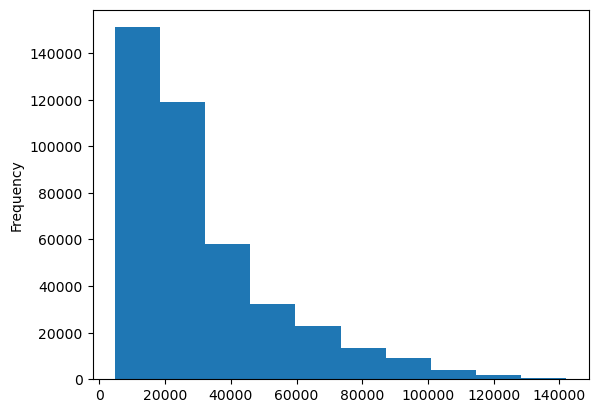

In [168]:
data["SalePrice"].plot.hist()

In [169]:
data["saledate"]

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

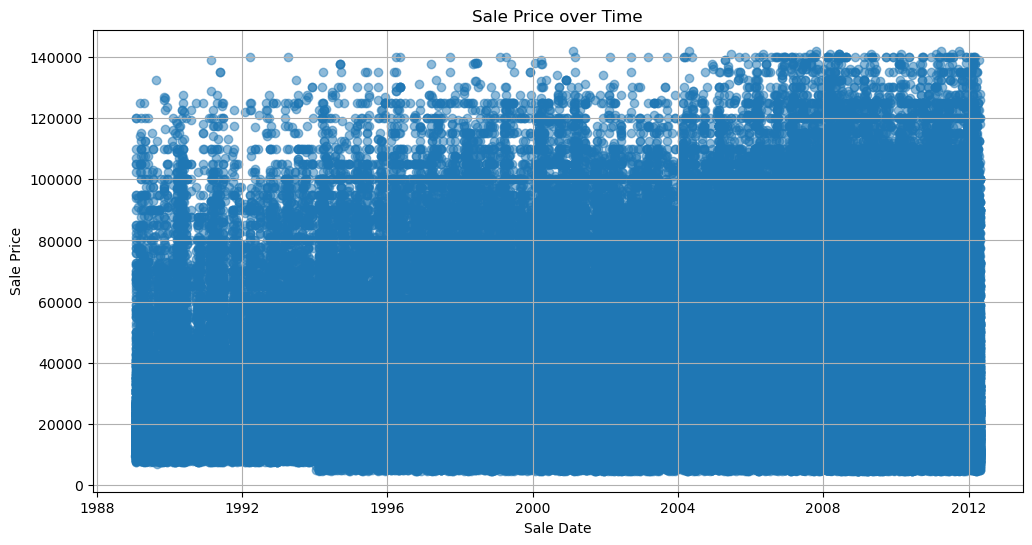

In [170]:
# Convert 'saledate' to datetime 
data['saledate'] = pd.to_datetime(data['saledate'])

# Plotting the relationship between saledate and SalePrice
plt.figure(figsize=(12, 6))
plt.scatter(data['saledate'], data['SalePrice'], alpha=0.5)
plt.title('Sale Price over Time')
plt.xlabel('Sale Date')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

In [171]:
data["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [172]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
data.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [174]:
# Sort data by 'saledate' in ascending order
data.sort_values(by='saledate', inplace=True, ascending=True)

# Display the sorted data
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [175]:
# Make a copy of orginal data
datacopy = data.copy()

In [176]:
datacopy

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Feature Engineering

In [177]:
# Create new columns
datacopy['saleYear'] = datacopy['saledate'].dt.year
datacopy['saleMonth'] = datacopy['saledate'].dt.month
datacopy['saleDay'] = datacopy['saledate'].dt.day
datacopy['saleDayOfWeek'] = datacopy['saledate'].dt.dayofweek
datacopy['saleDayOfYear'] = datacopy['saledate'].dt.dayofyear

# Drop the original 'saledate' column
datacopy.drop('saledate', axis=1, inplace=True)

In [178]:
datacopy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [179]:
datacopy["state"].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# 3. Split the data into x label and y label

In [180]:
x = datacopy.drop("SalePrice",axis=1)
y = datacopy["SalePrice"]

# 4. Split the data into x_train, x_test, y_train, y_test

In [181]:
# Split data into training and validation 
val_data = datacopy[datacopy["saleYear"] == 2012]
train_data = datacopy[datacopy["saleYear"] != 2012]

len(val_data), len(train_data)

(11573, 401125)

In [182]:
x_train, y_train = train_data.drop("SalePrice",axis=1), train_data["SalePrice"]
x_valid, y_valid = val_data.drop("SalePrice",axis=1), val_data["SalePrice"]
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, datacopy.shape

((401125, 56), (401125,), (11573, 56), (11573,), (412698, 57))

# 5. Clean data, Reduce data

# 6. Handling missing values ( Filling missing data with pandas, Filling missing values with sklearn: SimpleImputer)

In [183]:
# Chatgpt
# Handle missing values for x_train, x_valid seperately

# x_train
# Selecting only numerical columns
numerical_cols = x_train.select_dtypes(include=['number'])

# Finding null values in these columns
null_values = numerical_cols.isnull().sum()
null_values = null_values[null_values > 0]

print(null_values)

auctioneerID                 20136
MachineHoursCurrentMeter    258360
dtype: int64


In [184]:
# x_valid
# Selecting only numerical columns
numerical_cols = x_valid.select_dtypes(include=['number'])

# Finding null values in these columns
null_values = numerical_cols.isnull().sum()
null_values = null_values[null_values > 0]

print(null_values)

MachineHoursCurrentMeter    6834
dtype: int64


In [185]:
print(x_train[numerical_cols.columns].isnull().sum())

SalesID                          0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
saleYear                         0
saleMonth                        0
saleDay                          0
saleDayOfWeek                    0
saleDayOfYear                    0
dtype: int64


In [186]:
print(x_valid[numerical_cols.columns].isnull().sum())

SalesID                        0
MachineID                      0
ModelID                        0
datasource                     0
auctioneerID                   0
YearMade                       0
MachineHoursCurrentMeter    6834
saleYear                       0
saleMonth                      0
saleDay                        0
saleDayOfWeek                  0
saleDayOfYear                  0
dtype: int64


In [187]:
x_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B
fiBaseModel,TD20,A66,D7,A62,D3


In [188]:
# x_train
# Selecting only numerical columns
numerical_cols = x_train.select_dtypes(include=['number'])

# Identify columns that have missing values
cols_with_missing_values = [col for col in numerical_cols.columns if x_train[col].isnull().any()]

# Create the imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# For each numerical column with missing values, create a new column indicating missing values
for col in cols_with_missing_values:
    x_train[col + '_is_missing'] = x_train[col].isnull()

# Apply the imputer to the numerical columns
x_train[numerical_cols.columns] = imputer.fit_transform(numerical_cols)

# Check if there are any null values left in the original numerical columns
print(x_train[numerical_cols.columns].isnull().sum())

# Optionally, check the newly created 'is_missing' columns for columns that originally had missing values
print(x_train[[col + '_is_missing' for col in cols_with_missing_values]].head())


# Make new columns indicating what will be imputed
# for col in cols_with_missing:
#     X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
#     X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
saleYear                    0
saleMonth                   0
saleDay                     0
saleDayOfWeek               0
saleDayOfYear               0
dtype: int64
        auctioneerID_is_missing  MachineHoursCurrentMeter_is_missing
205615                    False                                 True
274835                    False                                 True
141296                    False                                 True
212552                    False                                 True
62755                     False                                 True


In [189]:
x_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770.0,1821514.0,1505138.0,1671174.0,1329056.0
MachineID,1126363.0,1194089.0,1473654.0,1327630.0,1336053.0
ModelID,8434.0,10150.0,4139.0,8591.0,4089.0
datasource,132.0,132.0,132.0,132.0,132.0
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974.0,1980.0,1978.0,1980.0,1984.0
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B
fiBaseModel,TD20,A66,D7,A62,D3


In [190]:
x_valid.head().T

,405675,401133,406076,409018,409026
SalesID,4449186,1222855,6258613,6282680,6282759
MachineID,2318824,531393,1810917,1543404,1863077
ModelID,26964,23926,13260,1830,11390
datasource,173,121,149,149,149
auctioneerID,99.0,3.0,99.0,99.0,99.0
YearMade,1996,1000,2000,2004,2006
MachineHoursCurrentMeter,0.0,8145.0,24.0,4373.0,3467.0
UsageBand,NaN,Low,Low,Medium,Medium
fiModelDesc,D65E12,12HNA,590SUPER LII,120C,160CLC
fiBaseModel,D65,12,590,120,160


In [191]:
# x_valid
# Selecting only numerical columns
numerical_cols = x_valid.select_dtypes(include=['number'])

# Identify columns that have missing values
cols_with_missing_values = [col for col in numerical_cols.columns if x_valid[col].isnull().any()]

# Create the imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# For each numerical column with missing values, create a new column indicating missing values
for col in cols_with_missing_values:
    x_valid[col + '_is_missing'] = x_valid[col].isnull()

# Apply the imputer to the numerical columns
x_valid[numerical_cols.columns] = imputer.fit_transform(numerical_cols)

# Check if there are any null values left in the original numerical columns
print(x_valid[numerical_cols.columns].isnull().sum())

# Optionally, check the newly created 'is_missing' columns for columns that originally had missing values
print(x_valid[[col + '_is_missing' for col in cols_with_missing_values]].head())

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
saleYear                    0
saleMonth                   0
saleDay                     0
saleDayOfWeek               0
saleDayOfYear               0
dtype: int64
        MachineHoursCurrentMeter_is_missing
405675                                False
401133                                False
406076                                False
409018                                False
409026                                False


In [192]:
# Filling missing catergorical values 
x_train.isna().sum()

SalesID                                     0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              331486
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        137191
fiModelSeries                          344217
fiModelDescriptor                      329206
ProductSize                            210775
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           296764
Enclosure                                 325
Forks                                  209048
Pad_Type                          

In [193]:
x_valid.isna().sum()

SalesID                                    0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                               7542
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                         3536
fiModelSeries                           9814
fiModelDescriptor                       8676
ProductSize                             5830
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                            8847
Enclosure                                  9
Forks                                   5935
Pad_Type                                9611
Ride_Contr

In [194]:
x_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770.0,1821514.0,1505138.0,1671174.0,1329056.0
MachineID,1126363.0,1194089.0,1473654.0,1327630.0,1336053.0
ModelID,8434.0,10150.0,4139.0,8591.0,4089.0
datasource,132.0,132.0,132.0,132.0,132.0
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974.0,1980.0,1978.0,1980.0,1984.0
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B
fiBaseModel,TD20,A66,D7,A62,D3


In [195]:
pd.api.types.is_object_dtype(x_valid["UsageBand"])

True

In [196]:
x_valid["UsageBand"]

405675       NaN
401133       Low
406076       Low
409018    Medium
409026    Medium
           ...  
410879       NaN
412476       NaN
411927       NaN
407124       NaN
409203       NaN
Name: UsageBand, Length: 11573, dtype: object

In [197]:
# Identify string columns
string_columns = [col for col in x_train.columns if x_train[col].dtype == 'object']
len(string_columns)


44

In [198]:
# Identify string columns
string_columns = [col for col in x_valid.columns if x_valid[col].dtype == 'object']
string_columns

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [199]:
for col in string_columns:
    # Fill NaN values with a placeholder in both datasets
    x_train[col].fillna('missing', inplace=True)
    x_valid[col].fillna('missing', inplace=True)
    

In [200]:
x_valid.isna().sum()

SalesID                                0
MachineID                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
MachineHoursCurrentMeter               0
UsageBand                              0
fiModelDesc                            0
fiBaseModel                            0
fiSecondaryDesc                        0
fiModelSeries                          0
fiModelDescriptor                      0
ProductSize                            0
fiProductClassDesc                     0
state                                  0
ProductGroup                           0
ProductGroupDesc                       0
Drive_System                           0
Enclosure                              0
Forks                                  0
Pad_Type                               0
Ride_Control                           0
Stick                                  0
Transmission    

In [201]:
x_train.isna().sum()

SalesID                                0
MachineID                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
MachineHoursCurrentMeter               0
UsageBand                              0
fiModelDesc                            0
fiBaseModel                            0
fiSecondaryDesc                        0
fiModelSeries                          0
fiModelDescriptor                      0
ProductSize                            0
fiProductClassDesc                     0
state                                  0
ProductGroup                           0
ProductGroupDesc                       0
Drive_System                           0
Enclosure                              0
Forks                                  0
Pad_Type                               0
Ride_Control                           0
Stick                                  0
Transmission    

# 7. Sort or Add columns accordingly

In [203]:
# x_train.to_csv("data/bluebook-for-bulldozers/x_train.csv",
#               index=False)

# x_valid.to_csv("data/bluebook-for-bulldozers/x_valid.csv",
#               index=False)

# Import preprocessed data
x_train = pd.read_csv("data/bluebook-for-bulldozers/x_train.csv",
                     low_memory=False)
x_valid = pd.read_csv("data/bluebook-for-bulldozers/x_valid.csv",
                     low_memory=False)


In [204]:
x_train.shape

(401125, 58)

In [205]:
x_valid.shape

(11573, 57)

In [206]:
missing_columns = set(x_train.columns) - set(x_valid.columns)
print("Columns in x_train but not in x_valid:", missing_columns)

Columns in x_train but not in x_valid: {'auctioneerID_is_missing'}


In [207]:
for col in missing_columns:
    x_valid[col] = False  # Or another default value as appropriate

In [208]:
x_train.shape

(401125, 58)

In [209]:
x_valid.shape

(11573, 58)

In [210]:
# Sort the columns in x_train
x_train = x_train.reindex(sorted(x_train.columns), axis=1)

# Sort the columns in x_valid to match the order of x_train
x_valid = x_valid.reindex(x_train.columns, axis=1)


# 8. Convert data into numericals (Categorcial features, using one hot encoder and column transformer, ordinal encoding, convert to category)

In [211]:
# Identify categorical columns
object_cols = x_train.select_dtypes(include=['object']).columns
object_cols

Index(['Backhoe_Mounting', 'Blade_Extension', 'Blade_Type', 'Blade_Width',
       'Coupler', 'Coupler_System', 'Differential_Type', 'Drive_System',
       'Enclosure', 'Enclosure_Type', 'Engine_Horsepower', 'Forks',
       'Grouser_Tracks', 'Grouser_Type', 'Hydraulics', 'Hydraulics_Flow',
       'Pad_Type', 'Pattern_Changer', 'ProductGroup', 'ProductGroupDesc',
       'ProductSize', 'Pushblock', 'Ride_Control', 'Ripper', 'Scarifier',
       'Steering_Controls', 'Stick', 'Stick_Length', 'Thumb', 'Tip_Control',
       'Tire_Size', 'Track_Type', 'Transmission', 'Travel_Controls',
       'Turbocharged', 'Undercarriage_Pad_Width', 'UsageBand', 'fiBaseModel',
       'fiModelDesc', 'fiModelDescriptor', 'fiModelSeries',
       'fiProductClassDesc', 'fiSecondaryDesc', 'state'],
      dtype='object')

In [212]:
# Initialize the OrdinalEncoder with handle_unknown option
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)


# Fit the encoder on the categorical columns of x_train
encoder.fit(x_train[object_cols])


OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [213]:
# Transform the categorical columns in x_train and x_valid
x_train[object_cols] = encoder.transform(x_train[object_cols])
x_valid[object_cols] = encoder.transform(x_valid[object_cols])


In [214]:
x_train.shape

(401125, 58)

In [215]:
x_valid.shape

(11573, 58)

# 9. Fit the train data into models. (Base models) and compare the aaccuracy or other metrics.

## Regression Problem: Ridge, RandomForestRegressor, structured data: ensemble methods,

In [235]:
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [236]:
model.score(x_valid,y_valid)

0.8704415974039512

In [239]:
from joblib import dump, load

# Save a model to file
best_model_file_name_joblib = "modelcopy.joblib"
dump(model, filename=best_model_file_name_joblib) 

['modelcopy.joblib']

In [240]:
# Import a saved joblib model
model = load(filename=best_model_file_name_joblib)

# 10. Evaluation: Determine score or accuracy using test data

## Evaluating a Regression model: Score method, cross_val_score, Scoring parameter, r2_score, mean_absolute_error, mean_squared_error, Root Mean squared error, Evluation function)

In [252]:
# Build a evaluation function (metric: RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# useful for hyperparameter tuning
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = { "Training MAE" : mean_absolute_error(y_train, train_preds),
              "Valid MAE" : mean_absolute_error(y_valid,val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid,val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid,val_preds),
             }
    return scores

# 11. Tune hyperparameters and determine score, (by hand, RandomizedSearchCV, GridSearchCV) (on subset -  to reduce training time) 

## Again evaluate the model - one we get from tuning

In [246]:
len(x_train)

401125

In [249]:
# Change max_sample_values
modeltune = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
modeltune

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [250]:
%%time
modeltune.fit(x_train,y_train)

CPU times: total: 1min 20s
Wall time: 5.73 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [255]:
show_scores(modeltune)

{'Training MAE': 5597.187584717981,
 'Valid MAE': 7218.022194763674,
 'Training RMSLE': 0.26050001939358186,
 'Valid RMSLE': 0.29681310957313617,
 'Training R^2': 0.8586203809972213,
 'Valid R^2': 0.8285912672812283}

In [270]:
%%time
# RandomSearchCV
# Parameter distributions
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 11.3 s
Wall time: 11.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [271]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [272]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 10121.976233166317,
 'Valid MAE': 12521.701986079011,
 'Training RMSLE': 0.44301984472971156,
 'Valid RMSLE': 0.48995260249831085,
 'Training R^2': 0.6021706373386349,
 'Valid R^2': 0.5645019046557305}

In [275]:
%%time
# Note: These were found after 100 iterations of RandomizedSearchCV.

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

# I didnt find this coz running 100 iterations will take huge amount time

ideal_model.fit(x_train, y_train)

CPU times: total: 5min 51s
Wall time: 27 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [288]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2962.1754179493637,
 'Valid MAE': 6023.261079249072,
 'Training RMSLE': 0.14514201851678607,
 'Valid RMSLE': 0.2500927324239785,
 'Training R^2': 0.9586140792043206,
 'Valid R^2': 0.8792865669772651}

# 12. Feature importance, clf.coeff_

In [289]:
ideal_model.feature_importances_

array([6.40252411e-04, 4.99503353e-03, 2.57732296e-03, 4.91036133e-03,
       1.52659780e-03, 2.78677172e-02, 3.50621654e-04, 1.49292138e-03,
       8.36430862e-02, 5.20200130e-03, 3.05333805e-03, 1.00143963e-03,
       9.33498572e-03, 1.13109371e-03, 4.27456744e-03, 5.40589418e-03,
       3.29054874e-03, 1.41329572e-03, 2.61799181e-02, 6.26252010e-02,
       1.29458700e-03, 1.01883322e-03, 2.90912148e-03, 4.46560548e-03,
       1.55564810e-01, 5.28217354e-03, 2.27116158e-03, 5.85148764e-03,
       3.33619573e-02, 1.14806513e-03, 4.77047370e-04, 2.55837893e-04,
       1.38957070e-03, 7.45056002e-04, 1.43488471e-03, 1.01870915e-02,
       3.06355443e-03, 1.17754507e-03, 3.72826079e-03, 1.17446132e-04,
       1.15825739e-03, 1.10892634e-03, 1.95019253e-01, 3.38892363e-03,
       2.75228623e-04, 1.81710272e-03, 4.32751557e-02, 4.70956719e-02,
       2.34984826e-02, 4.71026001e-03, 5.33003797e-02, 3.70301118e-02,
       5.69058889e-03, 2.92573642e-03, 9.89966373e-03, 3.81267577e-03,
      

In [291]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

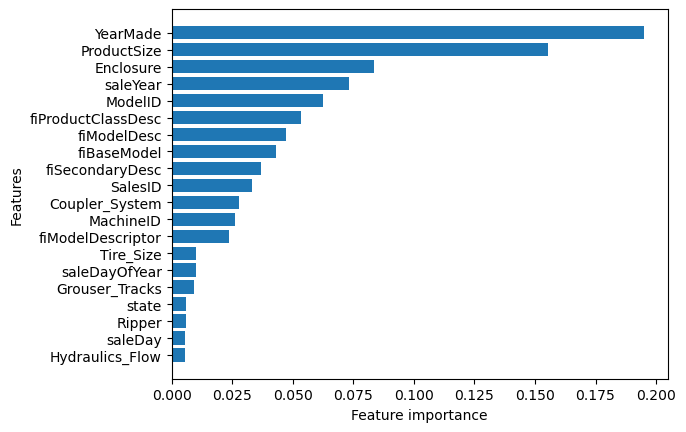

In [292]:
plot_features(x_train.columns, ideal_model.feature_importances_)